SELECT b.otype, b.ra,b.dec,b.rvz_redshift, b.rvz_radvel,b.plx_value,a.*
FROM basic as b INNER JOIN allfluxes as a on b.oid=a.oidref
WHERE b.otype = 'Sy1' or b.otype='Sy2'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("newSeyfert.csv")
print(df.to_string)

<bound method DataFrame.to_string of     OType          ra        dec  rvz_redshift    rvz_radvel  plx_value  \
0     Sy2  212.380237   5.192031      0.264400  69068.165900        NaN   
1     Sy1  151.880408  55.822027      0.172960  47424.395730        NaN   
2     Sy2  187.871036  67.034380      0.106190  30153.255370        NaN   
3     Sy2  150.134337  55.608594      0.214980  57651.019330     0.2539   
4     Sy1  174.122083  21.595833      0.029800   8800.758771        NaN   
..    ...         ...        ...           ...           ...        ...   
995   Sy2  206.990430  46.909721      0.027650   8174.705036     0.0062   
996   Sy2  172.549763   1.827354      0.050100  14643.810230        NaN   
997   Sy2  126.216366  20.991219      0.022940   6798.377340        NaN   
998   Sy1  243.350809  -9.293786      0.128589  36089.472590     0.0321   
999   Sy1  121.434059  11.511204      0.199120  53848.130150        NaN   

         u_      g_      r_      i_      z_  
0    19.860  18.

In [3]:
u_g=[]
g_r=[]
r_i=[]
i_z=[]

for i in df.index:
    u_g.append(df.loc[i,"u_"]-df.loc[i,"g_"])
    g_r.append(df.loc[i,"g_"]-df.loc[i,"r_"])
    r_i.append(df.loc[i,"r_"]-df.loc[i,"i_"])
    i_z.append(df.loc[i,"i_"]-df.loc[i,"z_"])
df["u-g"]=u_g
df["g-r"]=g_r
df["r-i"]=r_i
df["i-z"]=i_z



In [5]:
df.dropna(inplace=True)
values=df.to_numpy()
print(values)

[['Sy2' 150.1343371 55.60859413 ... 0.48300000000000054
  0.27800000000000225 0.038000000000000256]
 ['Sy1' 150.2218304 56.49650355 ... 0.6690000000000005
  0.30799999999999983 0.3739999999999988]
 ['Sy1' 150.9561036 57.11661511 ... 0.21399999999999864
  0.08900000000000219 0.41699999999999804]
 ...
 ['Sy1' 206.3142832 46.23690089 ... 0.46799999999999997
  0.3829999999999991 0.1509999999999998]
 ['Sy1' 176.722477 19.85717235 ... 0.6509999999999998 0.43599999999999994
  0.2469999999999999]
 ['Sy2' 206.9904301 46.9097214 ... 0.6330000000000027 0.31599999999999895
  0.25]]


<Axes: title={'center': 'u-g'}, xlabel='OType'>

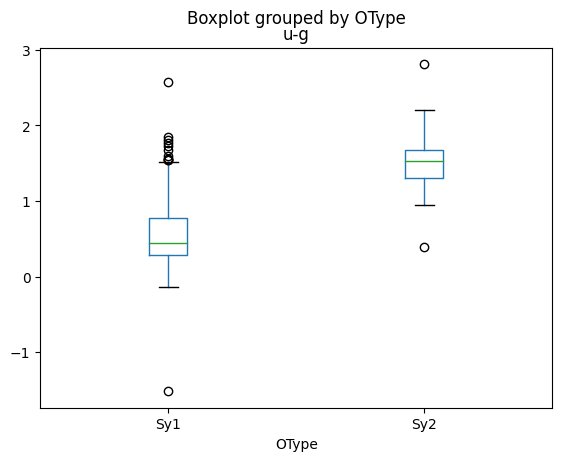

In [6]:


# plt.hist(new_Sy1["u-g"])

# plt.hist(new_Sy2["u-g"])
df.boxplot(by="OType",column=["u-g"],grid = False)

<Axes: title={'center': 'g-r'}, xlabel='OType'>

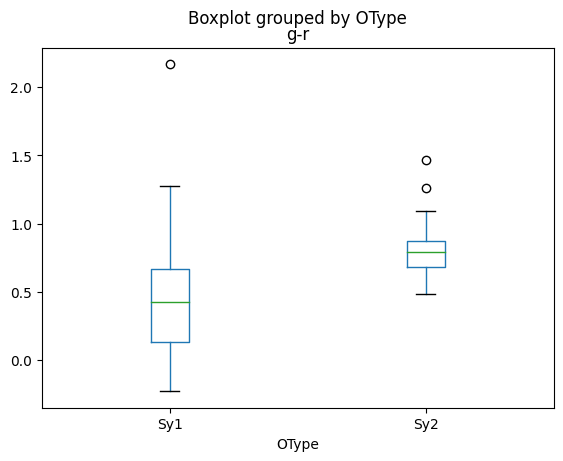

In [7]:
# plt.hist(new_Sy1["g-r"])
# plt.hist(new_Sy2["g-r"])
df.boxplot(by="OType",column=["g-r"],grid = False)

<Axes: title={'center': 'r-i'}, xlabel='OType'>

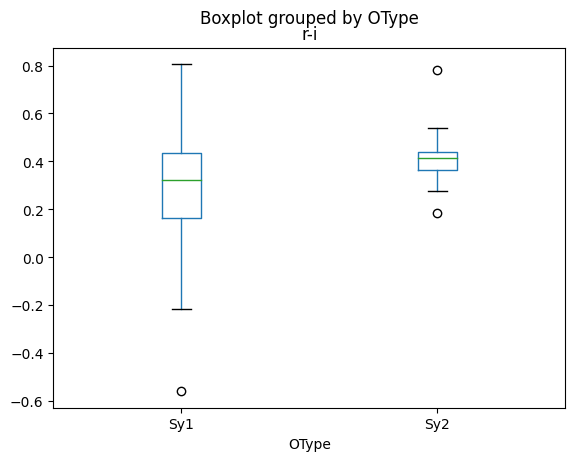

In [8]:
# plt.hist(new_Sy1["r-i"])
# plt.hist(new_Sy2["r-i"])
df.boxplot(by="OType",column=["r-i"],grid = False)

<Axes: title={'center': 'i-z'}, xlabel='OType'>

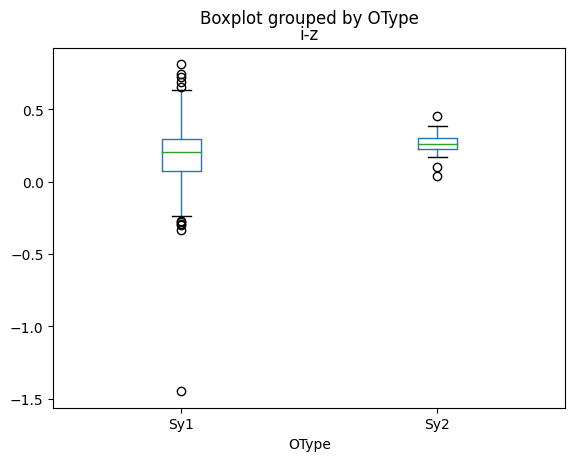

In [9]:
# plt.hist(new_Sy1["i-z"])
# plt.hist(new_Sy2["i-z"])
df.boxplot(by="OType",column=["i-z"],grid = False)

In [10]:
new_Sy1=df[df['OType']=="Sy1"]
new_Sy2=df[df['OType']=="Sy2"]

In [33]:
def LaTexCode(dataset):
    roundfactor=2
    stri=""
    for factor in dataset:
        stri=stri+"&"+str(round(factor,roundfactor))
    stri=stri+"&"+str(round(dataset["max"]-dataset["min"],roundfactor))
    return stri.strip("&")


In [31]:
print(LaTexCode(new_Sy1["u-g"].describe()))
print(LaTexCode(new_Sy1["g-r"].describe()))
print(LaTexCode(new_Sy1["r-i"].describe()))
print(LaTexCode(new_Sy1["i-z"].describe()))

338.0&0.57&0.44&-1.52&0.28&0.44&0.78&2.57&4.09
338.0&0.42&0.33&-0.23&0.13&0.43&0.66&2.17&2.4
338.0&0.29&0.19&-0.56&0.17&0.32&0.43&0.81&1.37
338.0&0.19&0.21&-1.45&0.07&0.21&0.3&0.81&2.26


In [36]:
print(LaTexCode(new_Sy2["u-g"].describe()))
print(LaTexCode(new_Sy2["g-r"].describe()))
print(LaTexCode(new_Sy2["r-i"].describe()))
print(LaTexCode(new_Sy2["i-z"].describe()))

40.0&1.52&0.39&0.39&1.31&1.53&1.67&2.81&2.42
40.0&0.8&0.19&0.48&0.68&0.79&0.87&1.47&0.99
40.0&0.41&0.09&0.18&0.36&0.41&0.44&0.78&0.6
40.0&0.26&0.07&0.04&0.23&0.26&0.3&0.45&0.41


In [22]:
data=new_Sy1["u-g"].describe()

In [25]:
print("&"+str(round(data["max"]-data["min"],2)))

&4.09
